In [2]:
import numpy as np
from utils import load_binary_file_bit_vector, get_all_anno_files, load_all_annotation_bit_vectors, get_row, count_set_bits, write_binary_file_bit_vector
from tqdm import tqdm
import time

In [3]:
num_rows = load_binary_file_bit_vector("anno_SRR2125928.fastq_embedding_little.bin").shape[0]
print(num_rows)

60801408


In [4]:
anno_files = get_all_anno_files("/media/data/tracy/metagraph/data", start_with="anno_")

In [5]:
anno_files

['anno_SRR2480591.fastq_embedding_little.bin',
 'anno_SRR2480565.fastq_embedding_little.bin',
 'anno_SRR2480561.fastq_embedding_little.bin',
 'anno_SRR2125940.fastq_embedding_little.bin',
 'anno_SRR2423591.fastq_embedding_little.bin',
 'anno_SRR2423593.fastq_embedding_little.bin',
 'anno_SRR2480578.fastq_embedding_little.bin',
 'anno_SRR2480569.fastq_embedding_little.bin',
 'anno_SRR2480562.fastq_embedding_little.bin',
 'anno_SRR2125938.fastq_embedding_little.bin',
 'anno_SRR2423304.fastq_embedding_little.bin',
 'anno_SRR2480592.fastq_embedding_little.bin',
 'anno_SRR2125931.fastq_embedding_little.bin',
 'anno_SRR2480558.fastq_embedding_little.bin',
 'anno_SRR2125929.fastq_embedding_little.bin',
 'anno_SRR2480564.fastq_embedding_little.bin',
 'anno_SRR2480585.fastq_embedding_little.bin',
 'anno_SRR2423310.fastq_embedding_little.bin',
 'anno_SRR2423590.fastq_embedding_little.bin',
 'anno_SRR2480560.fastq_embedding_little.bin',
 'anno_SRR2473219.fastq_embedding_little.bin',
 'anno_SRR242

In [6]:
preloaded_bit_vectors = load_all_annotation_bit_vectors(anno_files)

In [7]:
get_row(preloaded_bit_vectors, 0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [8]:
set_bits_each_row = np.zeros(num_rows)
for i in tqdm(range(num_rows)):
    row = get_row(preloaded_bit_vectors, i)
    set_bits_each_row[i] = count_set_bits(row)

100%|██████████| 60801408/60801408 [05:30<00:00, 183790.16it/s]


In [9]:
len(set_bits_each_row)

60801408

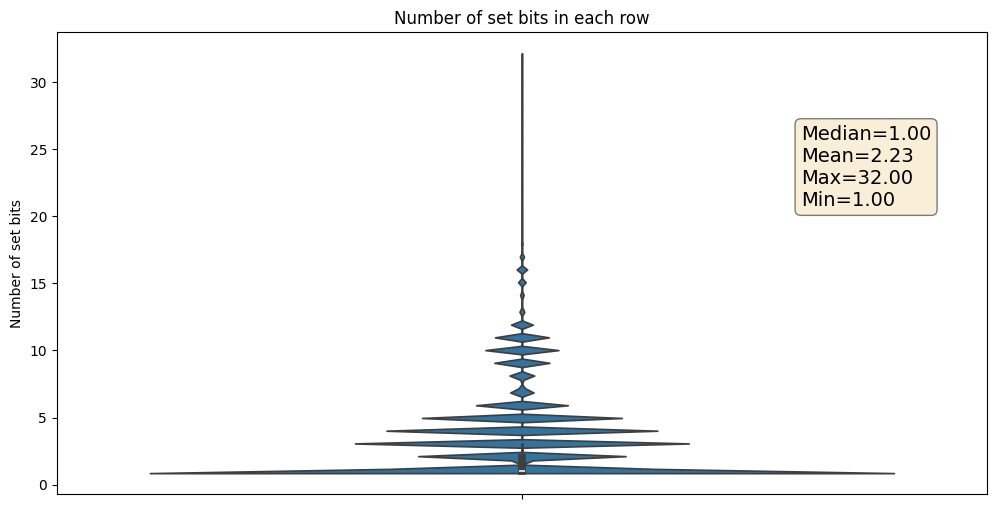

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.violinplot(set_bits_each_row)
plt.title("Number of set bits in each row")
plt.ylabel("Number of set bits")

# Add textbox for median, mean, max, and min on the top right corner
median = np.median(set_bits_each_row)
mean = np.mean(set_bits_each_row)
max_val = np.max(set_bits_each_row)
min_val = np.min(set_bits_each_row)

textstr = '\n'.join((
    r'Median=%.2f' % (median,),
    r'Mean=%.2f' % (mean,),
    r'Max=%.2f' % (max_val,),
    r'Min=%.2f' % (min_val,)))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
plt.text(0.8, 0.8, textstr, transform=plt.gca().transAxes, fontsize=14,
         verticalalignment='top', bbox=props)

plt.show()


In [10]:
# Sort the rows by the number of set bits in descending order
sorted_rows = np.argsort(set_bits_each_row)[::-1]
sorted_rows

array([42552610, 42853570, 58721329, ..., 36321473, 36321471,        0])

In [12]:
get_row(preloaded_bit_vectors, sorted_rows[1])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [14]:
# count number of rows with 32 set bits
np.sum(set_bits_each_row == 32)

1018

In [15]:
# Save the sorted rows
np.save("sorted_rows_index.npy", sorted_rows)

In [31]:
a = np.array([2, 4, 3, 1, 5])
a.argsort()
data = np.array([10, 1000, 100, 1, 10000])

data[a.argsort()]

array([    1,    10,   100,  1000, 10000])

In [17]:
# Sort the annotation files by the index
for anno_file in anno_files:
    anno_bit_vector = load_binary_file_bit_vector(anno_file)
    sorted_anno_bit_vector = anno_bit_vector[sorted_rows]
    write_binary_file_bit_vector(anno_file.replace("anno", "sorted_anno"), sorted_anno_bit_vector)

In [18]:
sorted_files = get_all_anno_files("/media/data/tracy/metagraph/data", start_with="sorted_anno_")

In [19]:
sorted_bit_vectors = load_all_annotation_bit_vectors(sorted_files)

In [20]:
sorted_bit_vectors[0]

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [22]:
get_row(sorted_bit_vectors, 0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)